In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
%matplotlib inline

In [190]:
def decision_boundary(X, y):
    plt.figure(figsize=(10, 5))
    for i, kernel in enumerate(['linear', 'rbf']):
        clf = SVC(kernel=kernel).fit(X, y)
        decision_function = clf.decision_function(X)
        support_vector_indices = np.where(
            np.abs(decision_function) <= 1 + 1e-15)[0]
        support_vectors = X[support_vector_indices]

        plt.subplot(1, 2, i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=plt.cm.brg_r)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=1,
                    linestyles=['--', '-', '--'])
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80,
                    linewidth=1.5, facecolors='None', edgecolors='k')
        plt.title("kernel = " + kernel)
    plt.tight_layout()
    plt.show()

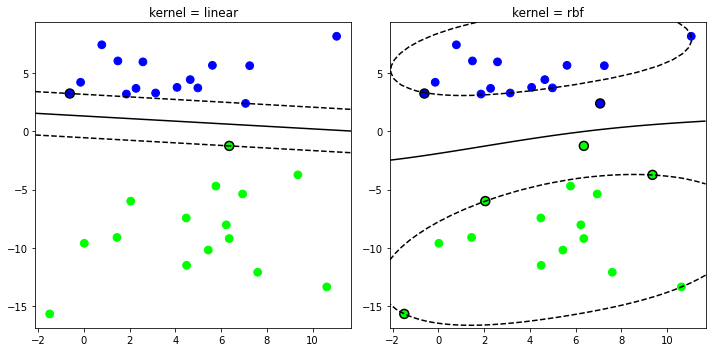

In [191]:
X, y = make_blobs(n_samples=30, centers=2, cluster_std=3.5, random_state=10)
decision_boundary(X, y)

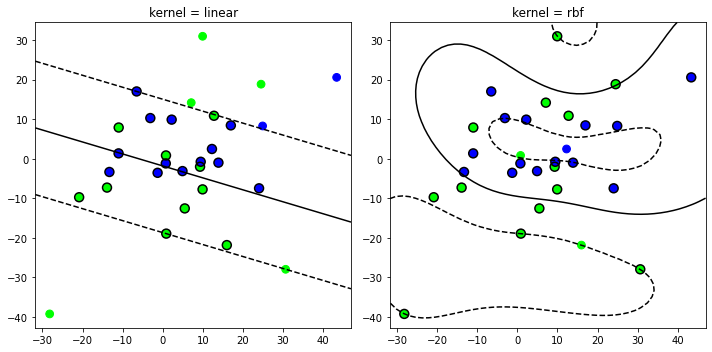

In [192]:
X, y = make_blobs(n_samples=30, centers=2, cluster_std=17, random_state=10)
decision_boundary(X, y)

In [222]:
from sklearn.svm import SVC
from mglearn.tools import make_handcrafted_dataset
from mglearn.plots import plot_2d_separator

x, y = make_handcrafted_dataset()

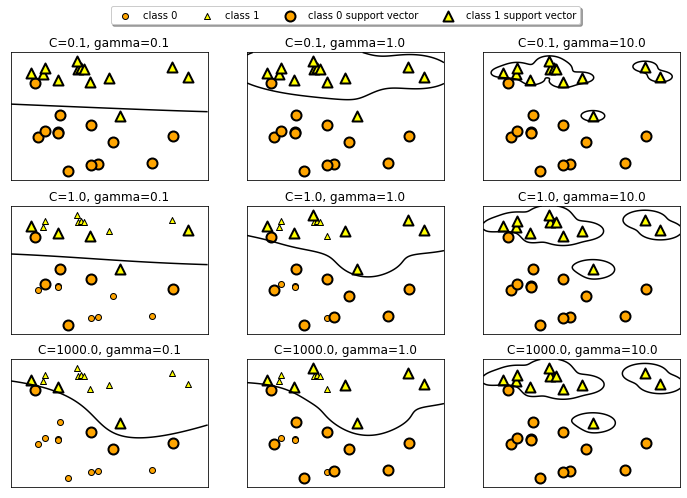

In [231]:
fig, axes = plt.subplots(figsize=(12,8), ncols=3, nrows=3) 

C_args = np.array([-1, 0, 3])
C_set = 10**C_args.astype(float)

gamma_args = np.arange(-1, 2)
gamma_set = 10**gamma_args.astype(float)

marker_set = ['o', '^']
for axe, C in zip(axes, C_set):
    for ax, gamma in zip(axe, gamma_set):
        params = {'C':C, 'gamma':gamma}

        svm = SVC(**params).fit(x, y)

        plot_2d_separator(svm, x, eps=0.5, ax=ax)
        ax.set_title('C={}, gamma={}'.format(C, gamma))

        color_set = ['orange', 'yellow']
        for i, m, color in zip(np.unique(y), marker_set, color_set):
            ax.scatter(x[y==i][:, 0], x[y==i][:, 1], marker=m,
                       label='class {}'.format(i), c=color, edgecolors='k')

        sv = svm.support_vectors_
        idx = svm.dual_coef_.ravel() < 0
        idx_set = np.array([idx, ~idx])

        for i, idx, color, m in zip(np.unique(y), idx_set, color_set, marker_set):
            ax.scatter(sv[idx][:, 0], sv[idx][:, 1], marker=m,
                       c=color, label='class {} support vector'.format(i), s=100,
                       edgecolors='k', linewidths=2)
        
axes[0, 1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), fancybox=True, shadow=True, ncol=4)
plt.show()